Library Imports

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Dataset

In [5]:
def load_dataset(data_path, img_size=(64, 64)):
    """
    Load images from the dataset folder, resize, and convert to grayscale.
    """
    categories = os.listdir(data_path)  # Class names
    data = []
    labels = []

    for label, category in enumerate(categories):
        folder_path = os.path.join(data_path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, img_size)  # Resize to consistent dimensions
            data.append(img.flatten())  # Flatten the image to 1D
            labels.append(label)  # Use the folder name as the label

    return np.array(data), np.array(labels)

In [12]:
np.array(data), np.array(labels)

(array([[ 22,  22,  22, ...,  99,  70,  95],
        [ 84,  85,  84, ..., 151,  88,  98],
        [ 29,  25,  23, ...,  78,  75,  55],
        ...,
        [ 21,  18,   0, ...,  57,  49,  49],
        [  9,   8,  12, ...,   1,   1,   1],
        [ 80,  60,  59, ...,  73,  66, 114]], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))

# Step 2: Euclidean Distance

In [8]:
def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two points.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 3: k-NN Algorithm

In [9]:
def knn_classifier(train_data, train_labels, test_data, k):
    """
    Classify a single test instance using k-Nearest Neighbors.
    """
    distances = [euclidean_distance(test_data, train_data[i]) for i in range(len(train_data))]
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = [train_labels[i] for i in k_nearest_indices]

    # Find the most common label (without Counter)
    label_counts = {}
    for label in k_nearest_labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    most_common_label = max(label_counts, key=label_counts.get)

    return most_common_label

# Step 4: Manual 5-Fold Cross-Validation

In [10]:

def manual_cross_validation(data, labels, k_values, folds=5):
    """
    Perform manual 5-fold cross-validation and return average accuracies for each k.
    """
    data_split = np.array_split(data, folds)
    labels_split = np.array_split(labels, folds)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for i in range(folds):
            # Prepare test and train sets for the current fold
            test_indices = range(i * len(data) // folds, (i + 1) * len(data) // folds)
            train_indices = [j for j in range(len(data)) if j not in test_indices]

            X_test, y_test = data[test_indices], labels[test_indices]
            X_train, y_train = data[train_indices], labels[train_indices]

            # Evaluate on the validation set
            correct = 0
            for j, test_sample in enumerate(X_test):
                pred = knn_classifier(X_train, y_train, test_sample, k)
                if pred == y_test[j]:
                    correct += 1
            fold_accuracies.append(correct / len(X_test))

        avg_accuracies.append(sum(fold_accuracies) / folds)

    return avg_accuracies

# Step 5: Visualization

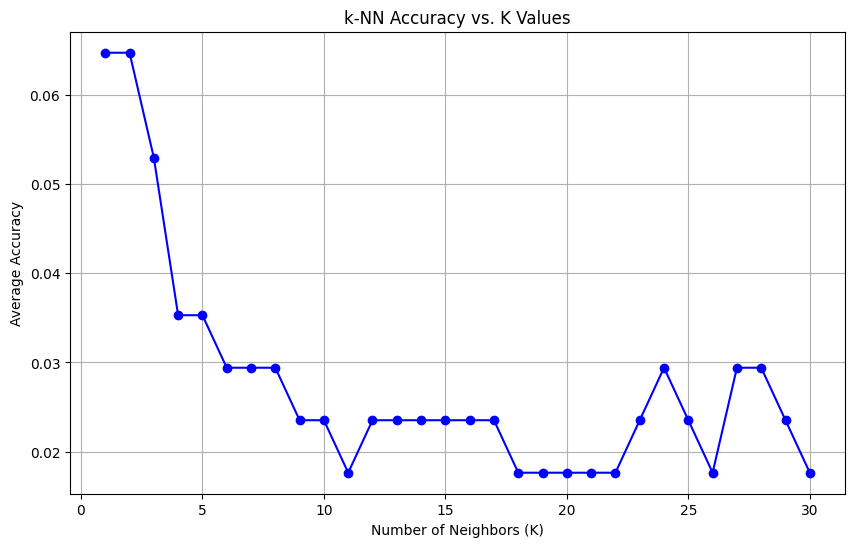

In [11]:
def plot_accuracies(k_values, avg_accuracies):
    """
    Plot average accuracies for each k value.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b')
    plt.title('k-NN Accuracy vs. K Values')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Average Accuracy')
    plt.grid(True)
    plt.show()

# Main Code Execution
if __name__ == "__main__":
    # Load the dataset
    data_path = "/content/drive/MyDrive/Colab Notebooks/CVPR/Animals"  # Path to your dataset folder
    img_size = (64, 64)  # Resize images to 64x64
    data, labels = load_dataset(data_path, img_size)

    # Define K values
    k_values = range(1, 31)

    # Perform manual 5-fold cross-validation
    avg_accuracies = manual_cross_validation(data, labels, k_values, folds=5)

    # Plot the results
    plot_accuracies(k_values, avg_accuracies)